# Data exploration

Initial data exploration and processing steps

## Set-up

In [1]:
import os
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('..')

In [3]:
pd.options.display.max_columns = None

## Save column descriptions

In [4]:
column_descriptions = {
    'id_odsp': 'unique identifier of game (odsp stands from oddsportal.com)',
    'id_event': 'unique identifier of event (id_odsp + sort_order)',
    'sort_order': 'chronological sequence of events in a game',
    'time': 'minute of the game',
    'text': 'text commentary',
    'event_type': 'primary event. 11 unique events (see dictionary.txt)',
    'event_type2': 'secondary event (see dictionary.txt)',
    'side': '1-Home, 2-Away',
    'event_team': 'team that produced the event. In case of Own goals, event team is the team that beneficiated from the own goal',
    'opponent': 'team that the event happened against',
    'player': 'name of the player involved in main event (converted to lowercase and special chars were removed)',
    'player2': 'name of player involved in secondary event',
    'player_in': 'player that came in (only applies to substitutions)',
    'player_out': 'player substituted (only applies to substitutions)',
    'shot_place': 'placement of the shot (13 possible placement locations, available in the dictionary, only applies to shots)',
    'shot_outcome': '4 possible outcomes (1-On target, 2-Off target, 3-Blocked, 4-Hit the post)',
    'is_goal': 'binary variable if the shot resulted in a goal (own goals included)',
    'location': 'location on the pitch where the event happened (19 possible locations, available in the dictionary)',
    'bodypart': '(1- right foot, 2-left foot, 3-head)',
    'assist_method': 'in case of an assisted shot, 5 possible assist methods (details in the dictionary)',
    'situation': '4 types: 1-Open Play, 2-Set piece (excluding Direct Free kicks), 3-Corner, 4-Free kick',
    'fast_break': 'binary',
    'link_odsp': 'link to oddsportal page',
    'adv_stats': 'boolean if the game has detailed event data',
    'date': 'Date of game',
    'league': 'Club League',
    'season': 'Year Played',
    'country': 'Host Nation of League',
    'ht': 'home team',
    'at': 'away team',
    'fthg': 'full time home goals',
    'ftag': 'full time away goals',
    'odd_h': 'highest home win market odds',
    'odd_d': 'highest draw market odds',
    'odd_a': 'highest away market odds',
    'odd_over': 'highest over 2.5 market odds',
    'odd_under': 'highest under 2.5 market odds',
    'odd_bts': 'highest both teams to score market odds',
    'odd_bts_n': 'highest both teams NOT to score market odds'
}

In [5]:
len(column_descriptions)

39

In [6]:
with open('data/raw/column_descriptions.json', 'w') as fp:
    json.dump(column_descriptions, fp)

## Load data

## Outer join data

In [7]:
events = pd.read_csv('data/raw/events.csv')
print(events.shape)
events.head()

(941009, 22)


,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [8]:
ginf = pd.read_csv('data/raw/ginf.csv')
print(ginf.shape)
ginf.head()

(10112, 18)


,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [9]:
combined_df = events.merge(ginf, on='id_odsp', how='outer', indicator=True)

In [10]:
combined_df['_merge'].value_counts()

both          941009
right_only      1038
left_only          0
Name: _merge, dtype: int64

In [11]:
combined_df[combined_df['_merge'] == 'right_only']['adv_stats'].value_counts()

False    930
True     108
Name: adv_stats, dtype: int64

In [12]:
combined_df[(combined_df['_merge'] == 'right_only') & (combined_df['adv_stats'] == True)].sample(n=10)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n,_merge
941985,nslrGZML/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/soccer/spain/primera-division-2014-2015/espan...,True,2014-11-29,SP1,2015,spain,Espanyol,Levante,2,1,1.77,4.00,6.10,NaN,NaN,NaN,NaN,right_only
941970,xEsT6ASA/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/soccer/spain/primera-division-2014-2015/valen...,True,2014-11-09,SP1,2015,spain,Valencia,Athletic Bilbao,0,0,1.70,4.10,6.90,NaN,NaN,NaN,NaN,right_only
942028,tEA8jaaf/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/soccer/germany/bundesliga/darmstadt-b-monchen...,True,2016-05-14,D1,2016,germany,SV Darmstadt 98,Borussia Monchengladbach,0,2,4.05,4.10,2.06,NaN,NaN,NaN,NaN,right_only
941954,vJF2jkrU/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/soccer/spain/primera-division-2014-2015/grana...,True,2014-11-01,SP1,2015,spain,Granada,Real Madrid,0,4,16.00,7.20,1.31,NaN,NaN,NaN,NaN,right_only
942029,UZhAetM4/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/soccer/italy/serie-a/napoli-frosinone-UZhAetM4/,True,2016-05-14,I1,2016,italy,Napoli,Frosinone,4,0,1.15,21.00,51.00,NaN,NaN,NaN,NaN,right_only
941972,MPoH1z8S/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/soccer/spain/primera-division-2014-2015/barce...,True,2014-11-22,SP1,2015,spain,Barcelona,Sevilla,5,1,1.30,7.50,12.45,NaN,NaN,NaN,NaN,right_only
941994,GxMcSnsE/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/soccer/germany/bundesliga-2014-2015/freiburg-...,True,2015-02-07,D1,2015,germany,SC Freiburg,Borussia Dortmund,0,3,6.25,4.60,1.66,NaN,NaN,NaN,NaN,right_only
942001,Q5nxSh5L/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/soccer/germany/bundesliga-2014-2015/freiburg-...,True,2015-05-02,D1,2015,germany,SC Freiburg,SC Paderborn,1,2,1.97,3.80,4.55,NaN,NaN,NaN,NaN,right_only
942032,xKxE2Yci/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/soccer/france/ligue-1-2015-2016/troyes-marsei...,True,2016-05-14,F1,2016,france,Troyes,Marseille,1,1,5.25,4.76,1.75,NaN,NaN,NaN,NaN,right_only
942020,lGVTcs7K/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/soccer/germany/bundesliga/augsburg-hamburger-...,True,2016-05-14,D1,2016,germany,FC Augsburg,Hamburg SV,1,3,2.07,3.90,4.20,NaN,NaN,NaN,NaN,right_only


In [13]:
combined_df[(combined_df['_merge'] == 'right_only')]['text'].unique()

array([nan], dtype=object)

Only right-only entries all of which have no text commentary. We therefore do an inner join of the DataFrames.

## Inner join

In [14]:
combined_df = events.merge(ginf, on='id_odsp', how='inner')

In [15]:
combined_df.shape

(941009, 39)

In [16]:
combined_df.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN


### Proportion of nulls

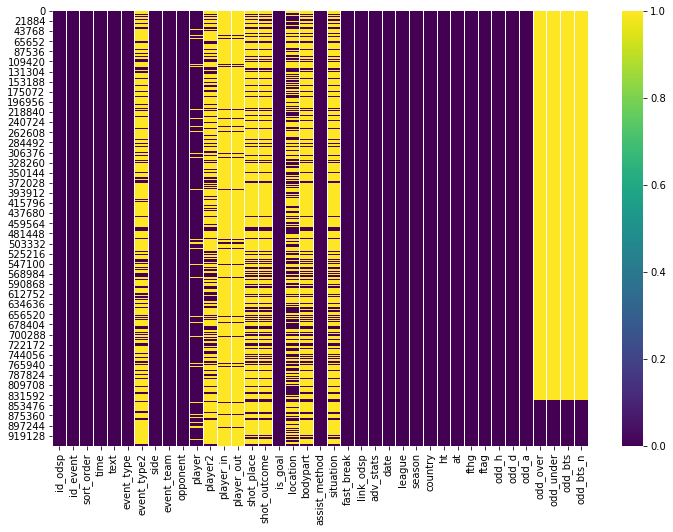

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df.isnull(), cmap='viridis')
plt.show()

In [18]:
combined_df.isnull().sum().sort_values(ascending=False)

player_in        889294
player_out       889271
odd_bts_n        842329
odd_under        842329
odd_over         842329
odd_bts          842329
event_type2      726716
shot_place       713550
shot_outcome     712511
situation        711872
bodypart         711824
player2          649699
location         473942
player            61000
opponent              0
side                  0
event_type            0
text                  0
time                  0
sort_order            0
id_event              0
event_team            0
assist_method         0
is_goal               0
fast_break            0
link_odsp             0
adv_stats             0
date                  0
league                0
season                0
country               0
ht                    0
at                    0
fthg                  0
ftag                  0
odd_h                 0
odd_d                 0
odd_a                 0
id_odsp               0
dtype: int64

In [19]:
FEATURES_WITH_NULLS = list(combined_df.isnull().sum()[combined_df.isnull().sum() > 0].index)

In [20]:
FEATURES_WITH_NULLS

['event_type2',
 'player',
 'player2',
 'player_in',
 'player_out',
 'shot_place',
 'shot_outcome',
 'location',
 'bodypart',
 'situation',
 'odd_over',
 'odd_under',
 'odd_bts',
 'odd_bts_n']

In [21]:
combined_df.drop(FEATURES_WITH_NULLS, axis=1, inplace=True)

In [22]:
combined_df.sample(n=5)

,id_odsp,id_event,sort_order,time,text,event_type,side,event_team,opponent,is_goal,assist_method,fast_break,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a
472619,Ec9OdNzN/,Ec9OdNzN108,108,90,Attempt blocked. Youssef El-Arabi (Granada CF)...,1,2,Granada,Real Sociedad,0,1,0,/soccer/spain/primera-division-2013-2014/real-...,True,2014-05-05,SP1,2014,spain,Real Sociedad,Granada,1,1,1.79,4.11,5.40
760140,hvNVD7X2/,hvNVD7X27,7,12,Foul by Francois Bellugou (Lorient).,3,1,Lorient,AS Monaco,0,0,0,/soccer/france/ligue-1-2015-2016/lorient-monac...,True,2016-01-17,F1,2016,france,Lorient,AS Monaco,0,2,3.30,3.34,2.51
88818,tvuQelxG/,tvuQelxG130,130,90,Franco Zuculini (Real Zaragoza) is shown the y...,4,2,Real Zaragoza,Espanyol,0,0,0,/soccer/spain/primera-division-2011-2012/espan...,True,2012-02-12,SP1,2012,spain,Espanyol,Real Zaragoza,0,2,1.69,3.91,6.60
34593,pKL5awbj/,pKL5awbj99,99,85,Dante (Borussia Monchengladbach) is shown the ...,4,2,Borussia Monchengladbach,TSG Hoffenheim,0,0,0,/soccer/germany/bundesliga-2011-2012/hoffenhei...,True,2011-10-22,D1,2012,germany,TSG Hoffenheim,Borussia Monchengladbach,1,0,2.15,3.50,3.95
711879,hUV9xIMe/,hUV9xIMe13,13,17,Attempt missed. Davide Astori (Fiorentina) hea...,1,2,Fiorentina,Hellas Verona,0,1,0,/soccer/italy/serie-a/verona-fiorentina-hUV9xIMe/,True,2015-10-28,I1,2016,italy,Hellas Verona,Fiorentina,0,2,5.50,4.05,1.83


- `id_event` just a concatenation of `id_odsp` and `sort_order` so drop
- `sort_order` needed for events which occured in the same minute
- Drop `link_odsp`
- Don't need specific date

In [23]:
COLUMNS_TO_DROP = ['id_event', 'link_odsp', 'date']

In [24]:
combined_df.groupby(['league', 'country']).count()

,,id_odsp,id_event,sort_order,time,text,event_type,side,event_team,opponent,is_goal,assist_method,fast_break,link_odsp,adv_stats,date,season,ht,at,fthg,ftag,odd_h,odd_d,odd_a
league,country,,,,,,,,,,,,,,,,,,,,,,,
D1,germany,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573,174573
E0,england,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920,118920
F1,france,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446,208446
I1,italy,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127,227127
SP1,spain,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943,211943


- `league` and `country` serve same purpose --> Drop `league`

In [25]:
COLUMNS_TO_DROP.append('league')

In [26]:
combined_df.sample(n=5)

,id_odsp,id_event,sort_order,time,text,event_type,side,event_team,opponent,is_goal,assist_method,fast_break,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a
37947,lzBaXFQN/,lzBaXFQN88,88,76,Foul by Sergio Pellissier (Chievo).,3,1,Chievo Verona,Bologna,0,0,0,/soccer/italy/serie-a-2011-2012/chievo-bologna...,True,2011-10-26,I1,2012,italy,Chievo Verona,Bologna,0,1,2.06,3.20,4.80
240846,AiBQOjGh/,AiBQOjGh92,92,67,Attempt missed. Ante Vukusic (Pescara) left fo...,1,1,US Pescara,Bologna,0,0,0,/soccer/italy/serie-a-2012-2013/pescara-bologn...,True,2013-02-03,I1,2013,italy,US Pescara,Bologna,2,3,3.55,3.37,2.38
737549,Sdcq8r0l/,Sdcq8r0l74,74,85,Attempt saved. RA©my Cabella (Marseille) right...,1,1,Marseille,Montpellier,0,1,0,/soccer/france/ligue-1-2015-2016/marseille-mon...,True,2015-12-06,F1,2016,france,Marseille,Montpellier,2,2,1.76,3.94,5.50
463016,pr52Ynh5/,pr52Ynh56,6,7,"Offside, FC Sevilla. Daniel CarriA§o tries a t...",9,1,Sevilla,Granada,0,0,0,/soccer/spain/primera-division-2013-2014/sevil...,True,2014-04-20,SP1,2014,spain,Sevilla,Granada,4,0,1.38,5.53,11.00
212532,29lhWvNP/,29lhWvNP49,49,45,"Goal! Atalanta 2, Parma 1. Amauri (Parma) hea...",1,2,Parma,Atalanta,1,2,0,/soccer/italy/serie-a-2012-2013/atalanta-parma...,True,2012-12-08,I1,2013,italy,Atalanta,Parma,2,1,2.44,3.36,3.40


In [27]:
COLUMNS_TO_DROP + FEATURES_WITH_NULLS

['id_event',
 'link_odsp',
 'date',
 'league',
 'event_type2',
 'player',
 'player2',
 'player_in',
 'player_out',
 'shot_place',
 'shot_outcome',
 'location',
 'bodypart',
 'situation',
 'odd_over',
 'odd_under',
 'odd_bts',
 'odd_bts_n']

- Drop odds columns (these will be predictive but purpose of task is to test power of NLP primarily)

In [28]:
for col in ['odd_h', 'odd_d', 'odd_a']:
    COLUMNS_TO_DROP.append(col)

In [29]:
COLUMNS_TO_DROP

['id_event', 'link_odsp', 'date', 'league', 'odd_h', 'odd_d', 'odd_a']

In [30]:
combined_df.drop(COLUMNS_TO_DROP, axis=1)

,id_odsp,sort_order,time,text,event_type,side,event_team,opponent,is_goal,assist_method,fast_break,adv_stats,season,country,ht,at,fthg,ftag
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,2,Hamburg SV,Borussia Dortmund,0,1,0,True,2012,germany,Borussia Dortmund,Hamburg SV,3,1
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,1,Borussia Dortmund,Hamburg SV,0,0,0,True,2012,germany,Borussia Dortmund,Hamburg SV,3,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,1,Borussia Dortmund,Hamburg SV,0,0,0,True,2012,germany,Borussia Dortmund,Hamburg SV,3,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,3,1,Borussia Dortmund,Hamburg SV,0,0,0,True,2012,germany,Borussia Dortmund,Hamburg SV,3,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,2,Hamburg SV,Borussia Dortmund,0,0,0,True,2012,germany,Borussia Dortmund,Hamburg SV,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,2,Sampdoria,Atalanta,0,0,0,True,2017,italy,Atalanta,Sampdoria,1,0
941005,z5L2OT5E/,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,2,Sampdoria,Atalanta,0,0,0,True,2017,italy,Atalanta,Sampdoria,1,0
941006,z5L2OT5E/,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,2,Sampdoria,Atalanta,0,1,0,True,2017,italy,Atalanta,Sampdoria,1,0
941007,z5L2OT5E/,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,1,Atalanta,Sampdoria,0,0,0,True,2017,italy,Atalanta,Sampdoria,1,0


In [31]:
column_descriptions['event_team']

'team that produced the event. In case of Own goals, event team is the team that beneficiated from the own goal'

- Don't need `ht` (home team) and `at` (away team) --> Create 'was_home' feature

In [32]:
combined_df['event_team_was_home'] = np.where(
    combined_df['event_team'] == combined_df['ht'],
    1, 
    0
)

In [33]:
for col in ['ht', 'at']:
    COLUMNS_TO_DROP.append(col)

In [34]:
combined_df.drop(COLUMNS_TO_DROP, axis=1)

,id_odsp,sort_order,time,text,event_type,side,event_team,opponent,is_goal,assist_method,fast_break,adv_stats,season,country,fthg,ftag,event_team_was_home
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,2,Hamburg SV,Borussia Dortmund,0,1,0,True,2012,germany,3,1,0
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,1,Borussia Dortmund,Hamburg SV,0,0,0,True,2012,germany,3,1,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,1,Borussia Dortmund,Hamburg SV,0,0,0,True,2012,germany,3,1,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,3,1,Borussia Dortmund,Hamburg SV,0,0,0,True,2012,germany,3,1,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,2,Hamburg SV,Borussia Dortmund,0,0,0,True,2012,germany,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,2,Sampdoria,Atalanta,0,0,0,True,2017,italy,1,0,0
941005,z5L2OT5E/,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,2,Sampdoria,Atalanta,0,0,0,True,2017,italy,1,0,0
941006,z5L2OT5E/,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,2,Sampdoria,Atalanta,0,1,0,True,2017,italy,1,0,0
941007,z5L2OT5E/,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,1,Atalanta,Sampdoria,0,0,0,True,2017,italy,1,0,1


In [35]:
(combined_df['side'] + combined_df['event_team_was_home']).unique()

array([2])

`side` is same as was_home so drop

In [36]:
COLUMNS_TO_DROP.append('side')

In [37]:
combined_df.drop(COLUMNS_TO_DROP, axis=1).sample(n=5)

,id_odsp,sort_order,time,text,event_type,event_team,opponent,is_goal,assist_method,fast_break,adv_stats,season,country,fthg,ftag,event_team_was_home
3017,pYve0J1O/,10,7,Attempt saved. GrA©gory Sertic (Bordeaux) righ...,1,Bordeaux,Lorient,0,4,0,True,2012,france,1,1,0
770234,vkdtSqM2/,59,69,Attempt saved. Mauro Icardi (Inter Milan) righ...,1,Internazionale,AC Milan,0,4,0,True,2016,italy,3,0,0
509435,YofHQElC/,78,76,"Corner, SC Paderborn 07. Conceded by Martin S...",2,SC Paderborn,Borussia Monchengladbach,0,0,0,True,2015,germany,1,2,1
517991,Ey6MNaQq/,21,33,Foul by Winston Reid (West Ham United).,3,West Ham,Burnley,0,0,0,True,2015,england,1,3,0
567217,4EWAALf0/,56,43,Foul by Valentin Roberge (Reims).,3,Stade de Reims,St Etienne,0,0,0,True,2015,france,1,2,1


In [38]:
combined_df['event_type'].dtype

dtype('int64')

In [39]:
EVENT_TYPE_MAP = {
    0: 'Announcement',
    1: 'Attempt',
    2: 'Corner',
    3: 'Foul',
    4: 'Yellow card',
    5: 'Second yellow card',
    6: 'Red card',
    7: 'Substitution',
    8: 'Free kick won',
    9: 'Offside',
    10: 'Hand ball',
    11: 'Penalty conceded'
}

In [40]:
combined_df['assist_method'].dtype

dtype('int64')

In [41]:
ASSIST_METHOD_MAP = {
    0: 'None',
    1: 'Pass',
    2: 'Cross',
    3: 'Headed pass',
    4: 'Through ball'
}

In [42]:
combined_df['assist_method'].value_counts()

0    773104
1    109534
2     43283
3      7713
4      7375
Name: assist_method, dtype: int64

In [43]:
combined_df['assist_method'] = combined_df['assist_method'].replace(ASSIST_METHOD_MAP)
combined_df['event_type'] = combined_df['event_type'].replace(EVENT_TYPE_MAP)

In [44]:
combined_df.drop(COLUMNS_TO_DROP, axis=1)

,id_odsp,sort_order,time,text,event_type,event_team,opponent,is_goal,assist_method,fast_break,adv_stats,season,country,fthg,ftag,event_team_was_home
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Hamburg SV,Borussia Dortmund,0,Pass,0,True,2012,germany,3,1,0
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,True,2012,germany,3,1,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,True,2012,germany,3,1,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,Borussia Dortmund,Hamburg SV,0,None,0,True,2012,germany,3,1,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,Hamburg SV,Borussia Dortmund,0,None,0,True,2012,germany,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,Free kick won,Sampdoria,Atalanta,0,None,0,True,2017,italy,1,0,0
941005,z5L2OT5E/,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",Corner,Sampdoria,Atalanta,0,None,0,True,2017,italy,1,0,0
941006,z5L2OT5E/,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,Attempt,Sampdoria,Atalanta,0,Pass,0,True,2017,italy,1,0,0
941007,z5L2OT5E/,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,Free kick won,Atalanta,Sampdoria,0,None,0,True,2017,italy,1,0,1


In [45]:
column_descriptions['fthg']

'full time home goals'

Don't need final score features --> Drop `fthg`, `ftag`

In [46]:
COLUMNS_TO_DROP.append('fthg')
COLUMNS_TO_DROP.append('ftag')

In [47]:
combined_df.drop(COLUMNS_TO_DROP, axis=1)

,id_odsp,sort_order,time,text,event_type,event_team,opponent,is_goal,assist_method,fast_break,adv_stats,season,country,event_team_was_home
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Hamburg SV,Borussia Dortmund,0,Pass,0,True,2012,germany,0
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,True,2012,germany,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,True,2012,germany,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,Borussia Dortmund,Hamburg SV,0,None,0,True,2012,germany,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,Hamburg SV,Borussia Dortmund,0,None,0,True,2012,germany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,Free kick won,Sampdoria,Atalanta,0,None,0,True,2017,italy,0
941005,z5L2OT5E/,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",Corner,Sampdoria,Atalanta,0,None,0,True,2017,italy,0
941006,z5L2OT5E/,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,Attempt,Sampdoria,Atalanta,0,Pass,0,True,2017,italy,0
941007,z5L2OT5E/,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,Free kick won,Atalanta,Sampdoria,0,None,0,True,2017,italy,1


In [48]:
combined_df['adv_stats'].unique()

array([ True])

All `False` values dropped in inner join so can remove this feature as well.

In [49]:
COLUMNS_TO_DROP.append('adv_stats')

In [50]:
COLUMNS_TO_DROP

['id_event',
 'link_odsp',
 'date',
 'league',
 'odd_h',
 'odd_d',
 'odd_a',
 'ht',
 'at',
 'side',
 'fthg',
 'ftag',
 'adv_stats']

## Explore data

In [51]:
combined_df.drop(COLUMNS_TO_DROP, axis=1, inplace=True)

In [52]:
combined_df.head()

,id_odsp,sort_order,time,text,event_type,event_team,opponent,is_goal,assist_method,fast_break,season,country,event_team_was_home
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Hamburg SV,Borussia Dortmund,0,Pass,0,2012,germany,0
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,Hamburg SV,Borussia Dortmund,0,None,0,2012,germany,0


In [53]:
# Number of goal events
total_goals = combined_df['is_goal'].sum()
print(f'Total goals: {total_goals}')
proportion_goal = total_goals / combined_df.shape[0]
print(f'Proportion of events which are goals: {proportion_goal}')

Total goals: 24446
Proportion of events which are goals: 0.02597849754890761


In [54]:
# Distribution of leagues
combined_df['country'].value_counts() / combined_df.shape[0]

italy      0.241365
spain      0.225230
france     0.221513
germany    0.185517
england    0.126375
Name: country, dtype: float64

In [55]:
set(combined_df[combined_df['country'] == 'england']['event_team'])

{'Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Burnley',
 'Cardiff',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Hull',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester Utd',
 'Middlesbrough',
 'Newcastle',
 'Norwich City',
 'QPR',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea',
 'Tottenham',
 'Watford',
 'West Brom',
 'West Ham'}

In [56]:
# Distribution of seasons
combined_df['season'].value_counts().sort_index() / combined_df.shape[0]

2012    0.160330
2013    0.163734
2014    0.187488
2015    0.192296
2016    0.191286
2017    0.104866
Name: season, dtype: float64

In [57]:
combined_df.head()

,id_odsp,sort_order,time,text,event_type,event_team,opponent,is_goal,assist_method,fast_break,season,country,event_team_was_home
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Hamburg SV,Borussia Dortmund,0,Pass,0,2012,germany,0
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,Hamburg SV,Borussia Dortmund,0,None,0,2012,germany,0


### Average events per match

In [58]:
# Number of matches
combined_df['id_odsp'].nunique()

9074

In [59]:
# Average events per match
combined_df.groupby('id_odsp').count()['country'].mean()

103.70387921534054

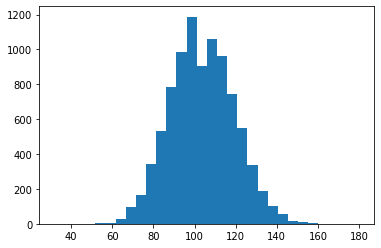

In [60]:
plt.hist(combined_df.groupby('id_odsp').count()['country'].values, bins=30)
plt.show()

In [61]:
combined_df.groupby('id_odsp').count()['country'].sort_values(ascending=False)

id_odsp
ITbfCc8F/    180
n18aEZzM/    166
nmXpPnVs/    160
jwbOIqLJ/    158
I7quacGK/    156
            ... 
YayM2axc/     58
lxecibSi/     53
fcn2MaLR/     52
8Yrk1i7R/     48
pKJblNH4/     32
Name: country, Length: 9074, dtype: int64

### Average events per match by league

In [78]:
# Average events per match
combined_df.groupby(['country', 'id_odsp']).count().reset_index().groupby('country').mean()['season']

country
england     91.547344
france     100.407514
germany    108.565299
italy      109.406069
spain      105.182630
Name: season, dtype: float64

In [82]:
combined_df.head()

,id_odsp,sort_order,time,text,event_type,event_team,opponent,is_goal,assist_method,fast_break,season,country,event_team_was_home
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Hamburg SV,Borussia Dortmund,0,Pass,0,2012,germany,0
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,Hamburg SV,Borussia Dortmund,0,None,0,2012,germany,0


## Text commentary examples

In [85]:
for i in range(30):
    print(f"{i+1}. {combined_df['text'].sample(n=1).item()}")

1. Attempt missed. Mario Gomez (Fiorentina) header from the centre of the box misses to the left. Assisted by Milan Badelj with a cross following a corner.
2. Goal!  Guingamp 0, Caen 1. Ronny Rodelin (Caen) left footed shot from the left side of the box to the top left corner. Assisted by Julien FA©ret.
3. Mehdi Mostefa (Ajaccio) wins a free kick in the defensive half.
4. Offside, Southampton. Eljero Elia tries a through ball, but Filip Djuricic is caught offside.
5. Foul by Emiliano Armenteros (Osasuna).
6. Foul by Johannes Geis (1. FSV Mainz 05).
7. Attempt saved. BafA©timbi Gomis (Lyon) right footed shot from the centre of the box is saved in the bottom right corner. Assisted by Alexandre Lacazette.
8. Attempt blocked. Cristiano Ronaldo (Real Madrid) right footed shot from the right side of the box is blocked. Assisted by Alvaro Arbeloa.
9. Lamine SanA© (Bordeaux) wins a free kick in the defensive half.
10. Substitution, Lorient. Romain Philippoteaux replaces Maxime Barthelme.
11. O